# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [3]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

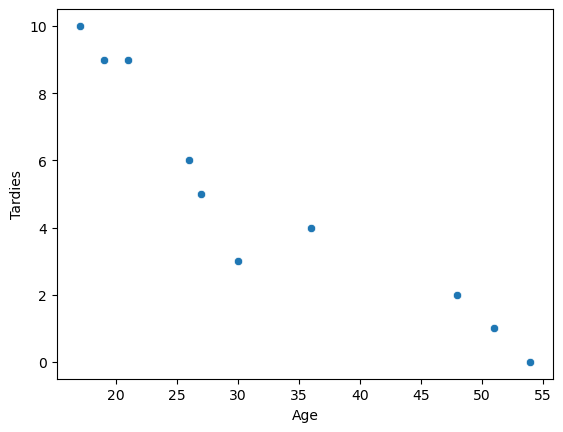

In [4]:
# Draw a scatter plot for the data
sns.scatterplot(data=student_data, x='Age', y='Tardies')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

> It seems that there is an inverse relationship between age and number of tardies. The younger the student, the more tardies they have.The points suggest that there is an almost linear relationship between the two variables (age and tardies).

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [17]:
# Calculate covariance and correlation of the variables.
covariance = np.cov(student_data['Age'], student_data['Tardies'])
correlation = np.corrcoef(student_data['Age'], student_data['Tardies'])
display(covariance)
display(correlation)
print(f'Covariance: {covariance[0][1]}')
print(f'Correlation: {correlation[0][1]}')

print("The covariance is negative, which means that the variables are inversely related. The correlation is also negative and close to -1, which confirms there is a linear relationship between the variables.")

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

array([[ 1.        , -0.93916269],
       [-0.93916269,  1.        ]])

Covariance: -45.56666666666666
Correlation: -0.9391626886887122
The covariance is negative, which means that the variables are inversely related. The correlation is also negative and close to -1, which confirms there is a linear relationship between the variables.


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Build a linear regression model
model = smf.ols(formula='Tardies ~ Age', data=student_data)
results = model.fit()
print(results.summary())
results.params

# I used the OLS regression model from the statsmodels library to build a linear regression model. 
# The model shows that the coefficient for the Age variable is -0.2428 and the intercept is 12.8888  
# The R-squared value is 0.8823, which means that 88.23% of the variance in the Tardies variable can 
# be explained by the Age variable.

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           5.57e-05
Time:                        15:19:23   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.0

c:\Users\Natanael\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


Intercept    12.888803
Age          -0.242821
dtype: float64

Plot your regression model on your scatter plot.

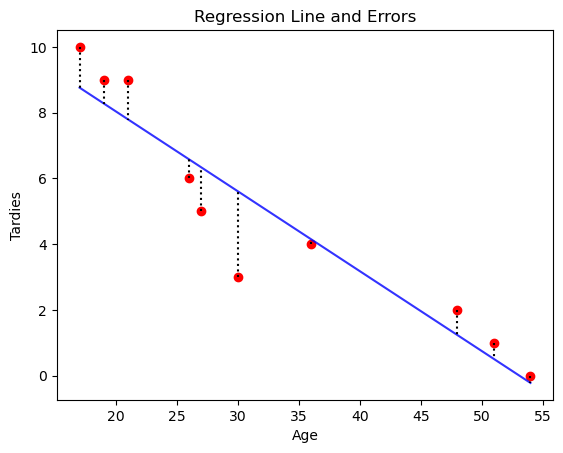

12.888803363135764 -0.2428207709159807


In [58]:
x = student_data['Age']
y = student_data['Tardies']

a0, a1 = results.params
plt.scatter(x, y, color='red')  # Scatter plot

# Plot the regression line
plt.plot([x.min(), x.max()], [a0 + a1 * x.min(), a0 + a1 * x.max()], alpha=0.8, color='blue')

# Add pointed black lines to illustrate the errors
for xi, yi in zip(x, y):
    plt.plot([xi]*2, [yi, a0 + a1 * xi], "k:")

# Optionally restrict the domain
# plt.xlim(2, 9); plt.ylim(0, 20)

plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Regression Line and Errors')
plt.show()

print(a0, a1)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

> The model indicates that there is a relationship between age and tardiness. The older the person, the less tardy they are. From the OSL, we obtained an R2 value of 0.88, which indicates that 88% of the variance in tardiness can be explained by age. The high value indicates that age is a good predictor of tardines, yet these results may not be accurate because the sample size is very small. Therefore, generalizing these results to the entire population may not be appropriate. More data is required to make a more accurate prediction.

### Extra practice with other libraries (sns and sklearn), not in the original lab

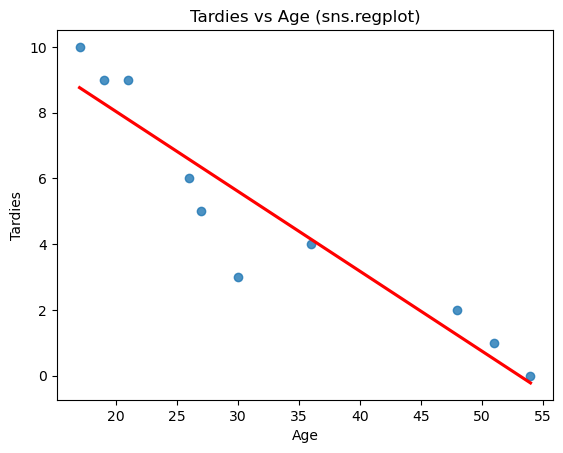

In [24]:
# Plot the regression line on scatter plot using sns for learning purposes
sns.regplot(data=student_data, x='Age', y='Tardies', ci=None, line_kws={'color':'red'})
# plot title
plt.title('Tardies vs Age (sns.regplot)')
plt.show()

Intercept: 12.888803363135768
Coefficient: [-0.24282077]


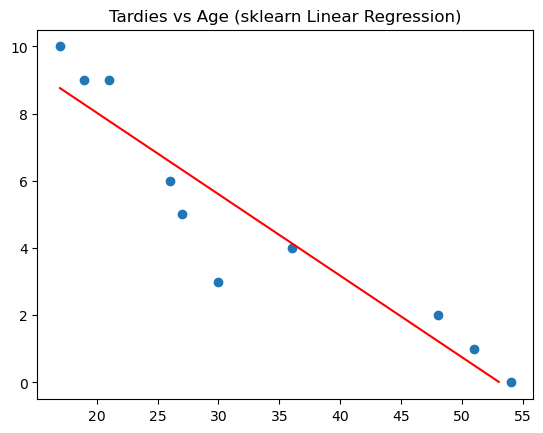

In [34]:
# Build linear regresion model and graph it using sklearn for learning purposes

lm = LinearRegression()
lm.fit(student_data[['Age']], student_data['Tardies'])
print(f'Intercept: {lm.intercept_}')
print(f'Coefficient: {lm.coef_}')

age_min, age_max = student_data['Age'].min(), student_data['Age'].max()

age_model = np.arange(age_min, age_max).reshape(-1, 1)                  # Create a range of ages
tardies_model = [lm.intercept_ + lm.coef_ * age for age in age_model]   # Calculate the tardies using the model

plt.scatter(student_data['Age'], student_data['Tardies'])               # Scatter plot
plt.plot(age_model, tardies_model, color='red')                         # Regression line
plt.title('Tardies vs Age (sklearn Linear Regression)')
plt.show()

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [ ]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [ ]:
# Your code here.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your code here.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your code here.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here.

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [2]:
# Your response here.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*